In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


# EDA

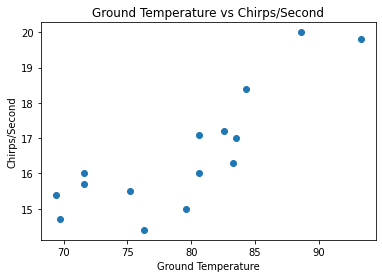

In [ ]:
plt.scatter(df['Ground Temperature'],df['Chirps/Second'])
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


### Correlation is good and there is a linear pattern in the data

## Data Splitting

In [ ]:
Y=df.iloc[:,:-1]
X=df.iloc[:,1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=8)
x_train=x_train.to_frame()
x_test=x_test.to_frame()
x_train,x_test

(    Ground Temperature
 12                80.6
 13                83.5
 10                79.6
 7                 71.6
 0                 88.6
 14                76.3
 8                 69.4
 5                 75.2
 9                 83.3
 1                 71.6
 4                 80.6
 3                 84.3,     Ground Temperature
 6                 69.7
 11                82.6
 2                 93.3)

## Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train,x_test

(array([[ 0.33167222],
        [ 0.84238874],
        [ 0.15556308],
        [-1.25331007],
        [ 1.74054537],
        [-0.4255971 ],
        [-1.64075018],
        [-0.61931715],
        [ 0.80716691],
        [-1.25331007],
        [ 0.33167222],
        [ 0.98327605]]), array([[-1.58791744],
        [ 0.68389051],
        [ 2.56825834]]))

## Model Fitting

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print(reg.intercept_)
print(reg.coef_)

[16.4]
[[1.08057635]]


## Predicting Test data

In [ ]:
y_pred=reg.predict(x_test)
y_pred

array([[14.68413397],
       [17.13899591],
       [19.17519922]])

## Evaluation Metrics

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.23389030081125264
Mean Squared Error: 0.1314497464058305
R2- SCORE: 0.9696809913466818


###R2 value is greaterthan .8 so we consider that this model is good fit for this data 

In [ ]:
#DATA Extrapolation
reg.predict(scaler.fit_transform([[95]]))

array([[16.4]])

In [ ]:
#Data interpolation
scaler.inverse_transform((18-reg.intercept_)/reg.coef_)

array([[96.4806913]])

### Plotting pred val

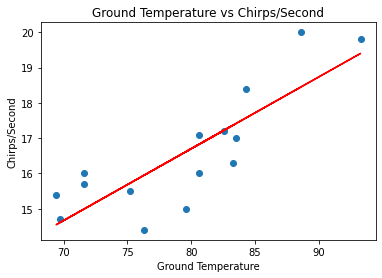

In [ ]:
X=X.to_frame()
reg.fit(X,Y)
plt.scatter(df['Ground Temperature'],df['Chirps/Second'])
plt.plot(X,reg.predict(X),color='r')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df1 = pd.read_fwf("brain_body.txt")

In [ ]:
df1.drop_duplicates()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


### Looking for Outliers

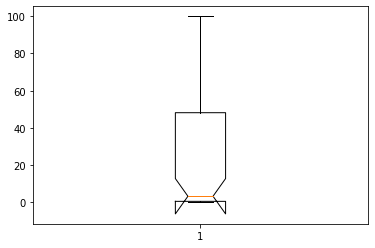

In [ ]:
plt.boxplot(df1['Brain'],notch=True,sym='',meanline=True)
plt.show()

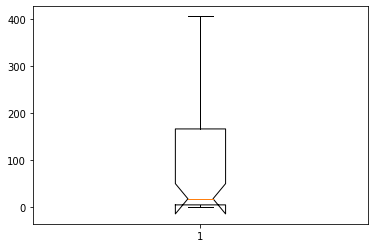

In [ ]:
plt.boxplot(df1['Body'],notch=True,sym='',meanline=True)
plt.show()

### Filtering outliers

In [ ]:
df3=df1[(df1['Brain'].between(0,119))&(df1['Body'].between(0,408))]
df3

,Brain,Body
0,3.385,44.50
1,0.480,15.50
2,1.350,8.10
4,36.330,119.50
5,27.660,115.00
6,14.830,98.20
7,1.040,5.50
8,4.190,58.00
9,0.425,6.40
10,0.101,4.00


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   50 non-null     float64
 1   Body    50 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB


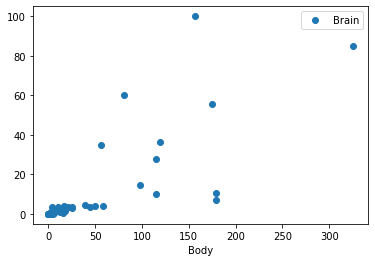

In [ ]:
df3.plot('Body','Brain',style='o')

In [ ]:
df3.corr()

,Brain,Body
Brain,1.000000,0.770497
Body,0.770497,1.000000


### Correlation is good and there is a linear pattern in the data

## Data Splitting

In [ ]:
Y=df3[['Brain']].values
X=df3[['Body']].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
x_train,x_test

(array([[2.400e+00],
        [2.560e+01],
        [1.700e+01],
        [3.250e+02],
        [3.000e+00],
        [1.570e+02],
        [1.230e+01],
        [3.920e+01],
        [1.750e+01],
        [1.900e+00],
        [4.000e+00],
        [1.250e+01],
        [5.600e+01],
        [1.000e+00],
        [1.150e+02],
        [6.300e+00],
        [3.500e+00],
        [1.210e+01],
        [1.000e+00],
        [2.500e+01],
        [4.000e-01],
        [2.100e+01],
        [1.140e+01],
        [3.900e+00],
        [4.450e+01],
        [1.790e+02],
        [2.500e+00],
        [8.100e+01],
        [1.230e+01],
        [1.750e+02],
        [1.795e+02],
        [5.800e+01],
        [9.820e+01],
        [1.200e+00],
        [1.080e+01],
        [1.400e-01],
        [5.700e+00],
        [1.150e+02],
        [3.300e-01],
        [1.195e+02]]), array([[ 2.6 ],
        [ 5.  ],
        [ 0.3 ],
        [ 6.4 ],
        [ 0.25],
        [ 6.6 ],
        [ 8.1 ],
        [15.5 ],
        [50.4 ],
      

## Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

## Model

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print(reg.intercept_)
print(reg.coef_)

[12.2264]
[[17.77461414]]


In [ ]:
y_pred=reg.predict(x_test)
y_pred

array([[ 5.75265750e-01],
       [ 1.17899382e+00],
       [-3.30698594e-03],
       [ 1.53116853e+00],
       [-1.58846541e-02],
       [ 1.58147920e+00],
       [ 1.95880925e+00],
       [ 3.82030414e+00],
       [ 1.25995165e+01],
       [ 1.30477050e+00]])

## Evaluation Metrics

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:',reg.score(scaler.transform(X),Y))

Mean Absolute Error: 1.562196786818119
Mean Squared Error: 8.419049078391673
R2- SCORE: 0.5934696518000337


## R2 value is less than 0.8 

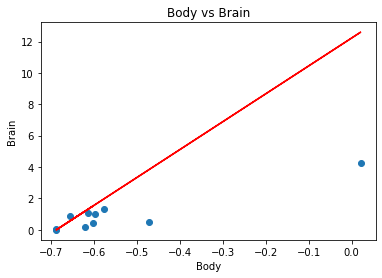

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,reg.predict(x_test),color='r')
plt.title('Body vs Brain')
plt.xlabel('Body')
plt.ylabel('Brain')
plt.show()

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df2 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df2.drop_duplicates()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
df2.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


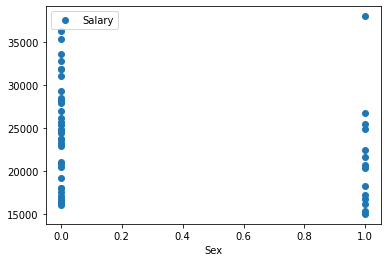

In [ ]:
df2.plot('Sex','Salary',style='o')
df2[['Sex','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


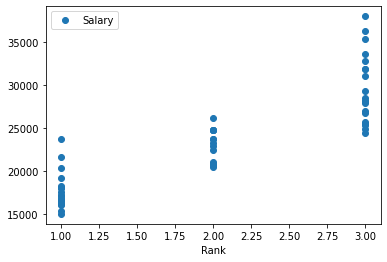

In [ ]:
df2.plot('Rank','Salary',style="o")
df2[["Rank",'Salary']].corr()

### There is  linear relation & good corelation between rank and salary 

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


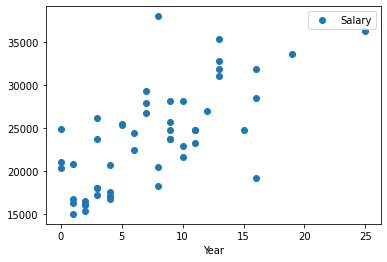

In [ ]:
df2.plot('Year','Salary',style='o')
df2[['Year','Salary']].corr()

### There is linear relation & good corelation between year and salary

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


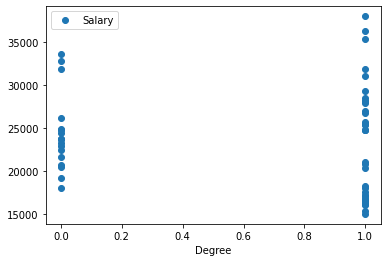

In [ ]:
df2.plot('Degree','Salary',style='o')
df2[['Degree','Salary']].corr()

### There is some linear relation but low corelation between datas so we can try transforming the data

In [ ]:
df2['Degree5']=np.sqrt(df2['Degree'])
df2['Degree4']=np.log(df2['Degree'])
df2['Degree3']=np.exp(df2['Degree'])
df2['Degree2']=df2['Degree']**2
df2[['Degree2','Degree3','Degree4','Degree5','Salary']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Degree2,Degree3,Degree4,Degree5,Salary
Degree2,1.000000,1.000000,NaN,1.000000,-0.069726
Degree3,1.000000,1.000000,NaN,1.000000,-0.069726
Degree4,NaN,NaN,NaN,NaN,NaN
Degree5,1.000000,1.000000,NaN,1.000000,-0.069726
Salary,-0.069726,-0.069726,NaN,-0.069726,1.000000


### I tried transforming those datas but corelation doesnot change so im going with original degree data

In [ ]:
df2

,Sex,Rank,Year,Degree,YSdeg,Salary,Degree5,Degree4,Degree3,Degree2
0,0,3,25,1,35,36350,1.0,0.0,2.718282,1
1,0,3,13,1,22,35350,1.0,0.0,2.718282,1
2,0,3,10,1,23,28200,1.0,0.0,2.718282,1
3,1,3,7,1,27,26775,1.0,0.0,2.718282,1
4,0,3,19,0,30,33696,0.0,-inf,1.000000,0
5,0,3,16,1,21,28516,1.0,0.0,2.718282,1
6,1,3,0,0,32,24900,0.0,-inf,1.000000,0
7,0,3,16,1,18,31909,1.0,0.0,2.718282,1
8,0,3,13,0,30,31850,0.0,-inf,1.000000,0
9,0,3,13,0,31,32850,0.0,-inf,1.000000,0


## Data Splitting

In [ ]:
Y=df2.iloc[:,5]
X=df2.iloc[:,:5]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=8)
x_train,x_test

(    Sex  Rank  Year  Degree  YSdeg
 46    1     1     2       1      6
 39    0     1     4       1      4
 16    0     3    13       1     20
 12    0     3     9       1     17
 37    0     1     4       1      4
 11    0     2    15       1     19
 17    0     2    11       0     14
 33    1     2     4       0     33
 47    1     1     2       1      2
 23    1     3     8       1     24
 6     1     3     0       0     32
 2     0     3    10       1     23
 30    1     1    10       0     15
 48    0     1     1       1      1
 7     0     3    16       1     18
 43    1     1     3       1      3
 42    0     2     0       1      7
 4     0     3    19       0     30
 44    0     1     2       1      3
 38    0     1     4       1      5
 24    0     2     9       1     12
 36    1     1     8       1     14
 14    0     3     9       1     24
 18    0     2    10       0     15
 34    1     2     6       0     29
 29    0     2     3       0     17
 15    0     3     7       1

## Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

## Fitting the model

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print(reg.intercept_)
print(reg.coef_)

23584.878048780487
[ 541.90209363 4744.22220267 2037.04544252 -417.35333396 -924.76156105]


In [ ]:
y_pred=reg.predict(x_test)
y_pred

array([17045.05160098, 20650.21481069, 29927.16901219, 16537.23301101,
       33648.87276288, 28303.52906974, 27003.23757032, 23558.56177946,
       16266.97636197, 18790.48483873, 22532.32580076])

## Evaluation Metrics

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 2280.2778314738302
Mean Squared Error: 8674624.830490055
R2- SCORE: 0.7959308873678596


### We got the better r2 value of 0.79

## Selecting whether sex is a factor in salary or not by doing  RFE

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(x_train, y_train)
list(zip(['Sex','Rank','Year','YSdeg'
       'Degree'],selector.support_))

[('Sex', False), ('Rank', True), ('Year', True), ('YSdegDegree', False)]

## Yes sex is the second best important feature in salary